In [1]:
library(ISLR);
library(caret);
data(Wage);
inTrain <- createDataPartition(y=Wage$wage,p=0.7,list=FALSE)
training <- Wage[inTrain,];
testing <- Wage[-inTrain,]

Loading required package: lattice
Loading required package: ggplot2


In [2]:
table(training$jobclass)


 1. Industrial 2. Information 
          1089           1013 

In [3]:
dummies <- dummyVars(wage ~ jobclass,data=training)
head(predict(dummies,newdata=training))

,jobclass.1. Industrial,jobclass.2. Information
231655,1,0
155159,0,1
376662,0,1
450601,1,0
377954,0,1
228963,0,1


In [4]:
nsv <- nearZeroVar(training,saveMetrics=TRUE)
nsv

,freqRatio,percentUnique,zeroVar,nzv
year,1.1377246,0.3330162,0.0000000,0.0000000
age,1.171429,2.901998,0.000000,0.000000
sex,0.00000000,0.04757374,1.00000000,1.00000000
maritl,3.0659574,0.2378687,0.0000000,0.0000000
race,8.868020,0.190295,0.000000,0.000000
education,1.4288660,0.2378687,0.0000000,0.0000000
region,0.00000000,0.04757374,1.00000000,1.00000000
jobclass,1.07502468,0.09514748,0.00000000,0.00000000
health,2.44026187,0.09514748,0.00000000,0.00000000
health_ins,2.26397516,0.09514748,0.00000000,0.00000000


In [5]:
library(splines)
bsBasis<- bs(training$age,df=3)
bsBasis

1,2,3
0,0,0
0.430813836393542,0.291090429995636,0.0655609076566748
0.306334127756705,0.424154946124668,0.195763821288309
0.424154946124668,0.306334127756705,0.0737471048303179
0.377630828102447,0.0906313987445873,0.00725051189956698
0.440355308650264,0.259696720486053,0.0510514920613608
0.335537578463294,0.407438488134,0.164915578530429
0.426168977207882,0.148232687724481,0.0171863985767514
0.444358195428149,0.227598100097345,0.0388582122117418
0.306334127756705,0.424154946124668,0.195763821288309


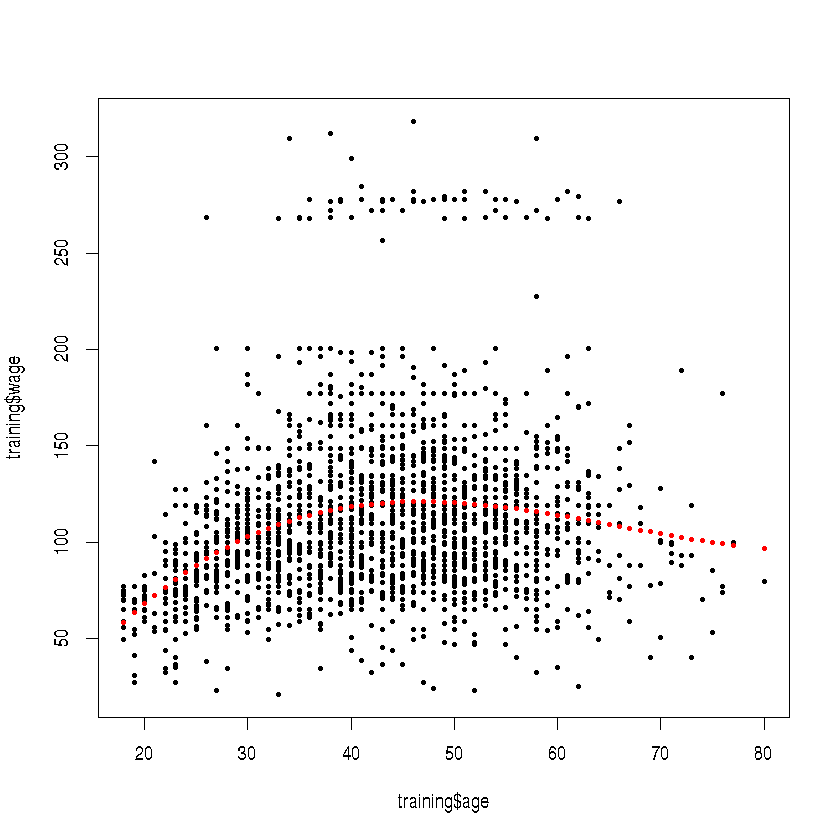

In [6]:
lm1<- lm(wage ~ bsBasis,data=training)
plot(training$age,training$wage,pch=19,cex=0.5)
points(training$age,predict(lm1,newdata=training),col="red",pch=19,cex=0.5)

In [7]:
predict(bsBasis,age=testing$age)

1,2,3
0,0,0
0.430813836393542,0.291090429995636,0.0655609076566748
0.306334127756705,0.424154946124668,0.195763821288309
0.424154946124668,0.306334127756705,0.0737471048303179
0.377630828102447,0.0906313987445873,0.00725051189956698
0.440355308650264,0.259696720486053,0.0510514920613608
0.335537578463294,0.407438488134,0.164915578530429
0.426168977207882,0.148232687724481,0.0171863985767514
0.444358195428149,0.227598100097345,0.0388582122117418
0.306334127756705,0.424154946124668,0.195763821288309


In [8]:
library(caret);
library(kernlab);
data(spam)
inTrain <- createDataPartition(y=spam$type,p=0.75,list=FALSE)
training <- spam[inTrain,]
testing <- spam[-inTrain,]

M <- abs(cor(training[-58]))
diag(M) <- 0
which(M > 0.8,arr.ind=T)


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



,row,col
num415,34,32
direct,40,32
num857,32,34
direct,40,34
num857,32,40
num415,34,40


In [9]:
names(spam)[c(34,32)]

[1] "num415" "num857"

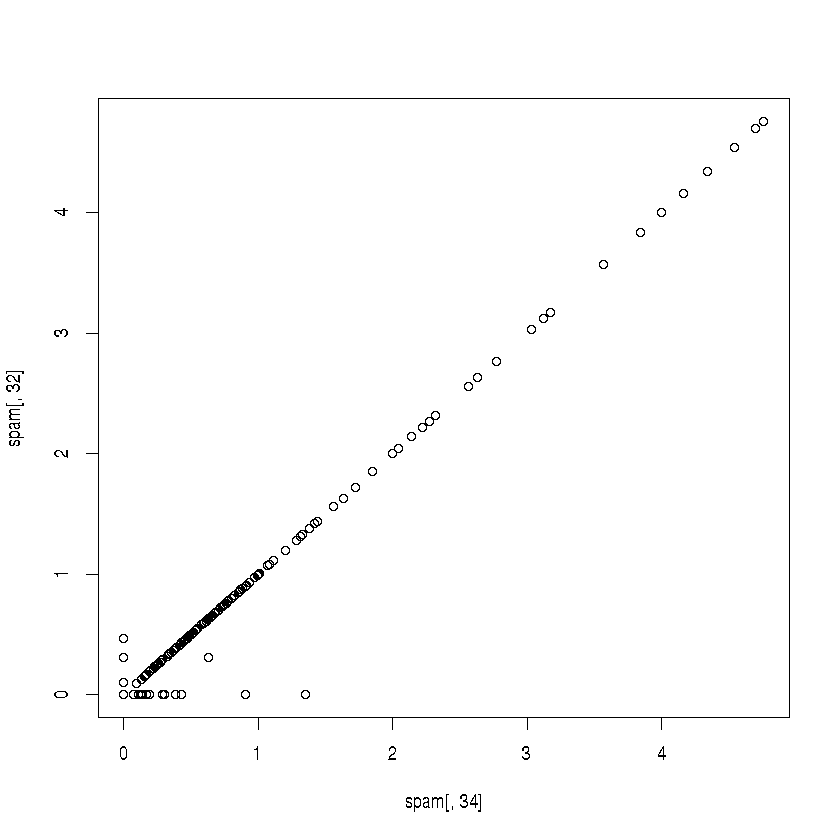

In [10]:
plot(spam[,34],spam[,32])

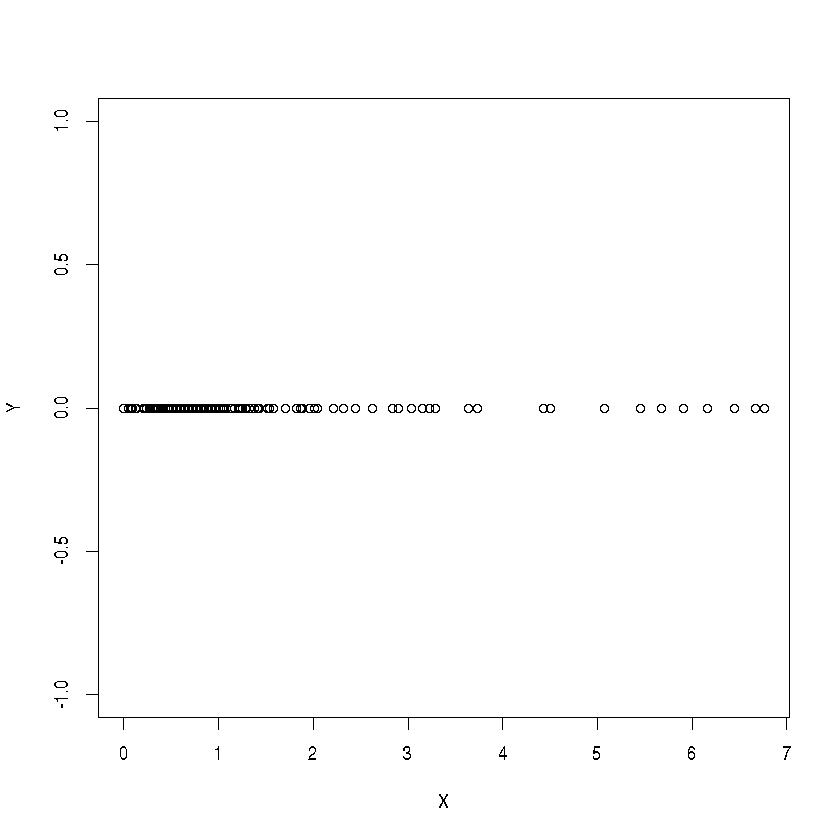

In [11]:
X <- 0.71*training$num415 + 0.71*training$num857
Y <- 0.71*training$num415 - 0.71*training$num415
plot(X,Y)

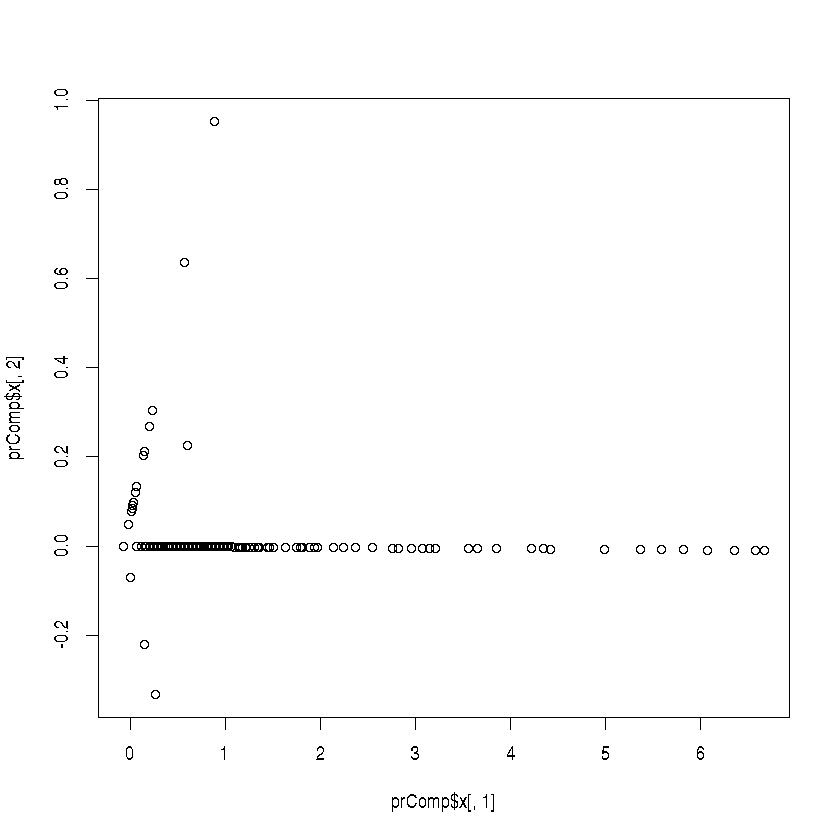

In [12]:
smallSpam <- spam[,c(34,32)]
prComp <- prcomp(smallSpam)
plot(prComp$x[,1],prComp$x[,2])

In [13]:
prComp$rotation

,PC1,PC2
num415,0.7080625,0.7061498
num857,0.7061498,-0.7080625


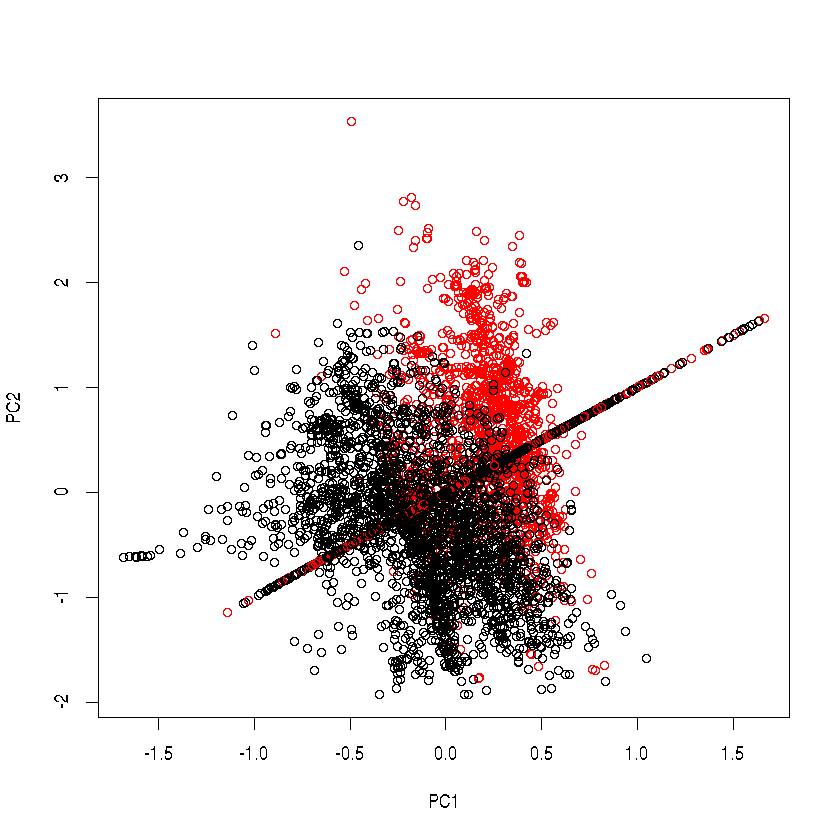

In [14]:
typeColor <- ((spam$type=="spam")*1+1)
prComp <- prcomp(log10(spam[,-58]+1))
plot(prComp$x[,-1],prComp$x[,-2],col=typeColor,xlab="PC1",ylab="PC2")

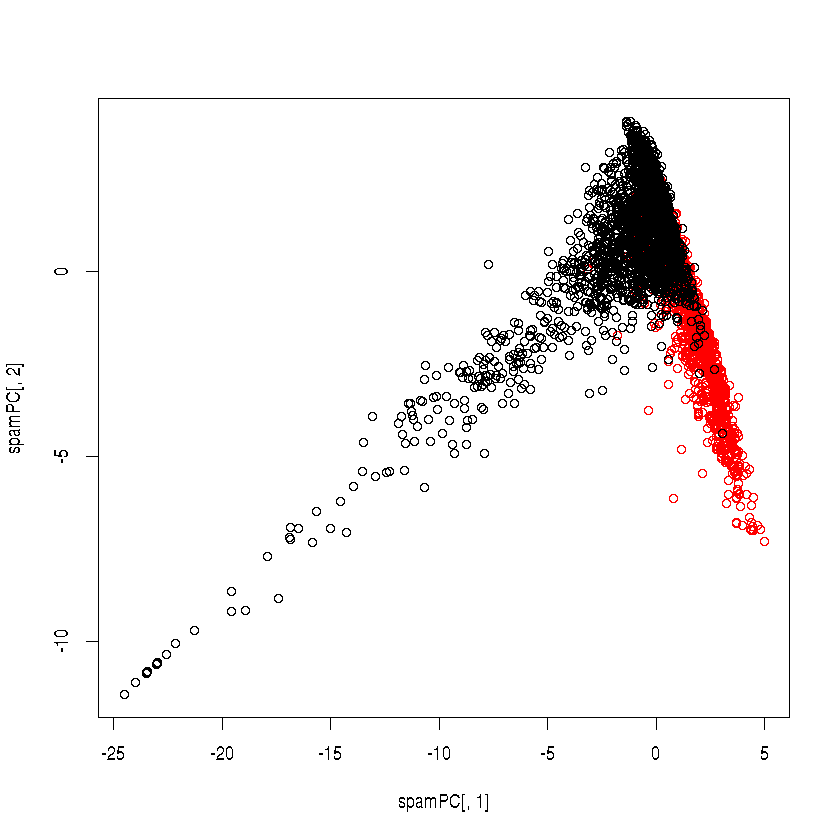

In [15]:
#Principal Component Analysis with Caret package
preProc <- preProcess(log10(spam[,-58]+1),method="pca",pcaComp=2)
spamPC <- predict(preProc,log10(spam[,-58]+1))
plot(spamPC[,1],spamPC[,2],col=typeColor)

In [16]:
preProc <- preProcess(log10(training[,-58]+1),method="pca",pcaComp=2)
trainPC <- predict(preProc,log10(training[,-58]+1))
modelFit <- train(training$type ~.,method="glm",data=trainPC)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

In [17]:
testPC <- predict(preProc,log10(testing[,-58]+1))
confusionMatrix(testing$type,predict(modelFit,testPC))

Confusion Matrix and Statistics

          Reference
Prediction nonspam spam
   nonspam     654   43
   spam         68  385
                                          
               Accuracy : 0.9035          
                 95% CI : (0.8849, 0.9199)
    No Information Rate : 0.6278          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7959          
 Mcnemar's Test P-Value : 0.02273         
                                          
            Sensitivity : 0.9058          
            Specificity : 0.8995          
         Pos Pred Value : 0.9383          
         Neg Pred Value : 0.8499          
             Prevalence : 0.6278          
         Detection Rate : 0.5687          
   Detection Prevalence : 0.6061          
      Balanced Accuracy : 0.9027          
                                          
       'Positive' Class : nonspam         
                                          

In [18]:
#Predicting with regressions
library(caret)
data(faithful)
set.seed(333)
inTrain <- createDataPartition(y=faithful$waiting,p=0.5,list=FALSE)
trainFaith <- faithful[inTrain,]
testFaith <- faithful[-inTrain,]
head(trainFaith)

,eruptions,waiting
1,3.6,79.0
3,3.333,74.000
5,4.533,85.000
6,2.883,55.000
7,4.7,88.0
8,3.6,85.0


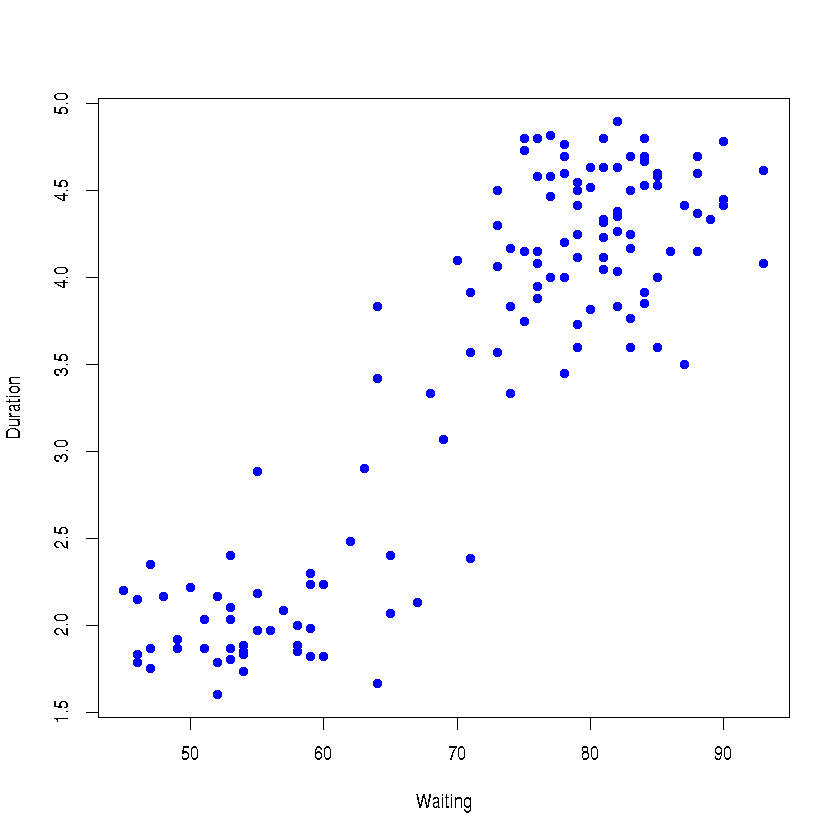

In [19]:
plot(trainFaith$waiting,trainFaith$eruptions,pch=19,col="blue",xlab="Waiting",ylab="Duration")

In [20]:
lm1 <- lm(eruptions ~ waiting,data=trainFaith)
summary(lm1)


Call:
lm(formula = eruptions ~ waiting, data = trainFaith)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26990 -0.34789  0.03979  0.36589  1.05020 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.792739   0.227869  -7.867 1.04e-12 ***
waiting      0.073901   0.003148  23.474  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.495 on 135 degrees of freedom
Multiple R-squared:  0.8032,	Adjusted R-squared:  0.8018 
F-statistic:   551 on 1 and 135 DF,  p-value: < 2.2e-16


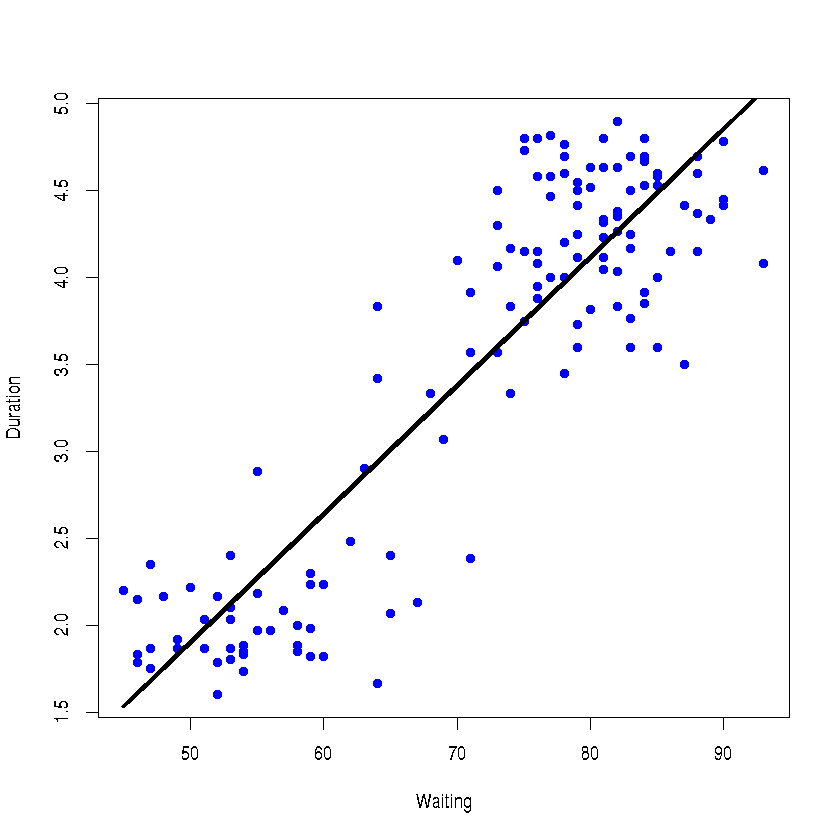

In [21]:
plot(trainFaith$waiting,trainFaith$eruptions,pch=19,col="blue",xlab="Waiting",ylab="Duration")
lines(trainFaith$waiting,lm1$fitted,lwd=3)

In [22]:
coef(lm1)[1] + coef(lm1)[2]*80

(Intercept) 
   4.119307

In [23]:
newdata <- data.frame(waiting=80)
predict(lm1,newdata)

1 
4.119307

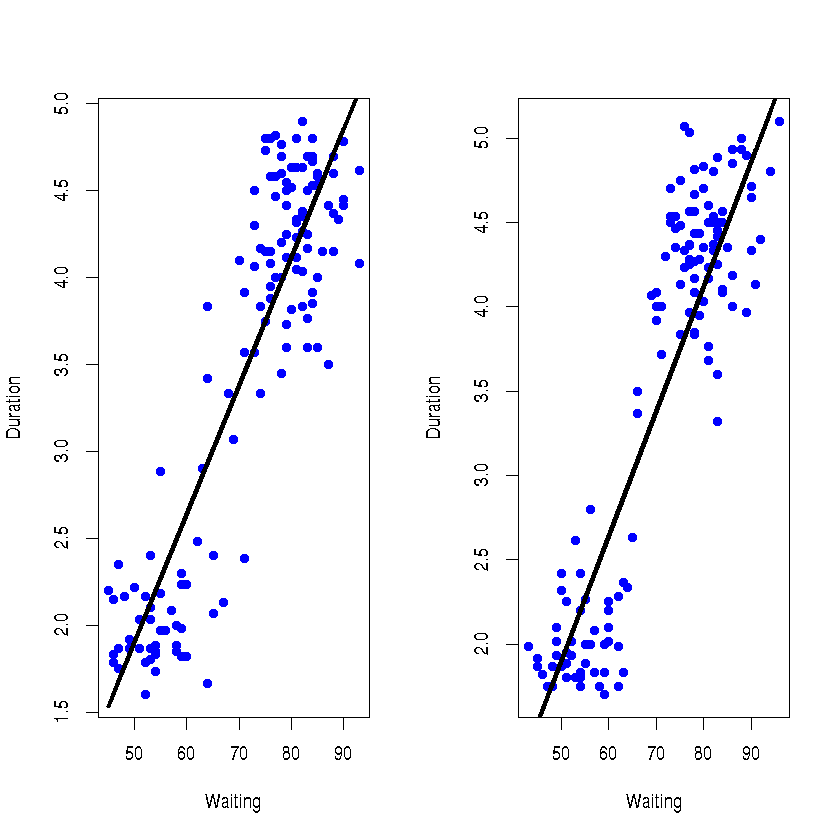

In [24]:
par(mfrow = c(1,2))
plot(trainFaith$waiting,trainFaith$eruptions,pch=19,col="blue",xlab="Waiting",ylab="Duration")
lines(trainFaith$waiting,predict(lm1),lwd=3)
plot(testFaith$waiting,testFaith$eruptions,pch=19,col="blue",xlab="Waiting",ylab="Duration")
lines(testFaith$waiting,predict(lm1,newdata=testFaith),lwd=3)

In [25]:
#Calculate RMSE on training data
sqrt(sum((lm1$fitted-trainFaith$eruptions)^2))

[1] 5.75186

In [26]:
#Calculate RMSE on testing data
sqrt(sum((predict(lm1,newdata=testFaith)-testFaith$eruptions)^2))

[1] 5.838559

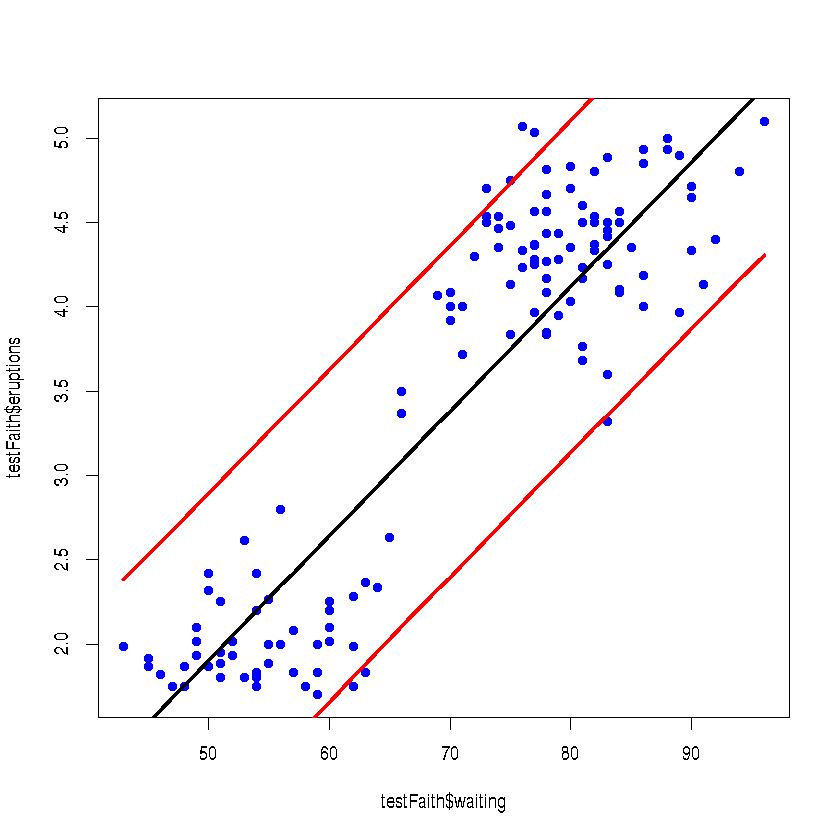

In [27]:
pred1 <- predict(lm1,newdata=testFaith,interval="prediction")
ord <- order(testFaith$waiting)
plot(testFaith$waiting,testFaith$eruptions,pch=19,col="blue")
matlines(testFaith$waiting[ord],pred1[ord,],type="l",,col=c(1,2,2),lty=c(1,1,1),lwd=3)